<a href="https://colab.research.google.com/github/niksisharma/Medical-Anomaly-Detection/blob/main/AnamolyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
data1 = pd.read_csv('data1.csv')

Saving data1.csv to data1.csv


In [ ]:
from google.colab import files
uploaded = files.upload()
data2 = pd.read_csv('data2.csv')

Saving data2.csv to data2.csv


In [ ]:
# print(data1,"\n\n\n",data2)
print("\033[1m" + "HEART DISEASE DATA" + "\033[0m")
data1.head()

HEART DISEASE DATA


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print("\033[1m" + "BREAST CANCER DATA" + "\033[0m")
data2.head()

BREAST CANCER DATA


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#define x train,test y train,test
#data.drop excludes target attribute from x, axis 0 is row and 1 is for column so column target is excluded
x1 = data1.drop('target',axis=1) 
#only target attribute is considered for y because target is know quantity ie we know who has heart disease and who does not
y1 = data1['target']
#x is basically all the characteristics of a person and y is the diagnosis of the person
#now y has known data and x has all other data attributes, and we split both into train and test groups
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=4)

#---------------------------------------------------------------------------------------------------------------------------------

x2 = data2.drop(['Unnamed: 32', 'id'], axis = 1)
y2 = data2['diagnosis']

# Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0
def diagnosis_value(diagnosis):
	if diagnosis == 'M':
		return 1
	else:
		return 0

data2['diagnosis'] = data2['diagnosis'].apply(diagnosis_value)

x2=data2[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']]
y2=data2[['diagnosis']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.33,random_state=42)


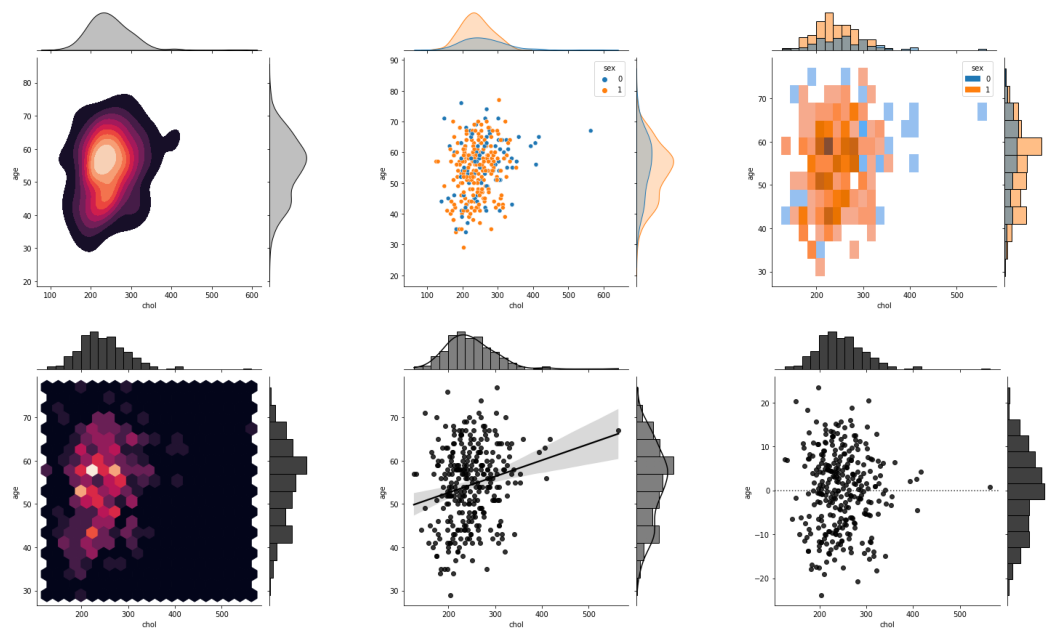

In [ ]:
#different plot types
p1 = sns.jointplot(data=data1,
x='chol',
y='age',
kind='kde',
cmap='rocket',
fill=True,
color='black',
#hue='sex'
) 

p2 = sns.jointplot(data=data1, x='chol', y='age', kind='scatter', cmap='rocket', color='black', hue='sex')
p3 = sns.jointplot(data=data1, x='chol', y='age', kind='hist', fill=True, cmap='rocket', color='black', hue='sex')
p4 = sns.jointplot(data=data1, x='chol', y='age', kind='hex', cmap='rocket', color='black')
p5 = sns.jointplot(data=data1, x='chol', y='age', kind='reg', color='black')
p6 = sns.jointplot(data=data1, x='chol', y='age', kind='resid', color='black')

#saving temp figs
p1.savefig('p1.png')
plt.close(p1.fig)

p2.savefig('p2.png')
plt.close(p2.fig)

p3.savefig('p3.png')
plt.close(p3.fig)

p4.savefig('p4.png')
plt.close(p4.fig)

p5.savefig('p5.png')
plt.close(p5.fig)

p6.savefig('p6.png')
plt.close(p6.fig)

import matplotlib.image as mpimg
# create subplots
f, axarr = plt.subplots(2, 3, figsize=(16,9))

axarr[0,0].imshow(mpimg.imread('p1.png'))
axarr[0,1].imshow(mpimg.imread('p2.png'))
axarr[0,2].imshow(mpimg.imread('p3.png'))
axarr[1,0].imshow(mpimg.imread('p4.png'))
axarr[1,1].imshow(mpimg.imread('p5.png'))
axarr[1,2].imshow(mpimg.imread('p6.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

In [ ]:
#standardize data method 1
#making sure that one data set can be compared to other data sets
sc1 = StandardScaler()
#making sure all data points in x set contributes equally to the model
#calling the function fit_transform in the class StandardScalar to transform data with mean=0 and std=1
x1_train = sc1.fit_transform(x1_train)
x1_test = sc1.fit_transform(x1_test)

In [ ]:
#standardize data method 2
sc2 = StandardScaler().fit(x2_train)
x2_train = sc2.transform(x2_train)

sc21 = StandardScaler().fit(x2_test)
x2_test = sc2.transform(x2_test)

In [ ]:
#verifying that mean=0 and std=1 of training data
print("\n\t",x1_train.mean(),x1_train.std(),"\n\t",x1_test.mean(),"\t",x1_test.std())
print("\n\t",x2_train.mean(),x2_train.std(),"\n\t",x2_test.mean(),"\t",x2_test.std())



	 -5.2229182340916454e-17 1.0 
	 6.944144012787864e-17 	 1.0

	 -5.223293363886071e-17 1.0 
	 -0.010070657815864253 	 0.9606019676049246


In [ ]:
%%capture
#initializing the algo KNeighboursClassifier to knn
knn1 = KNeighborsClassifier

#for parameter tuning
#parameters and grid_param are dictionaries
grid_params1 = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance'] , 'metric' : ['euclidean', 'manhattan']  }

#here the grid parameters are the hyper parameters used for selecting the best model
#GridSearchCV is the algorithm that selects the best parametes from the given dictionary above
#the algorithm considers the the parameters we have mentioned in grid_parameters and determines the best possible combination for knn
gs1 = GridSearchCV(knn1() , grid_params1 , cv = 4 , scoring='accuracy')
#applying the obtained optimal parameters to the training data
gs_results1 = gs1.fit(x1_train, y1_train)

#now we apply those parameter values to generate a model
model1 = gs_results1.best_estimator_
model1.score(x1_test, y1_test)

#------------------------------------------------------------------------------------------------------------------------------------

knn2 = KNeighborsClassifier
grid_params2 = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance'] , 'metric' : ['euclidean', 'manhattan']  }
gs2 = GridSearchCV(knn1() , grid_params2 , cv = 4 , scoring='accuracy')
gs_results2 = gs2.fit(x2_train, y2_train)

model2 = gs_results2.best_estimator_
model2.score(x2_test, y2_test)


In [ ]:
# printing the chosen values by the model
print("Heart dataset\n",gs_results1.best_params_)
print("\nBreast dataset\n",gs_results2.best_params_)

Heart dataset
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Breast dataset
 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


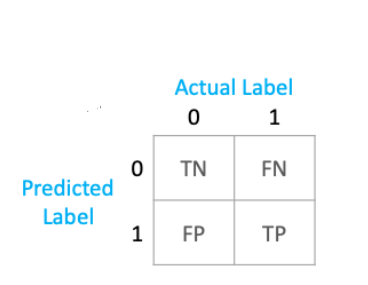

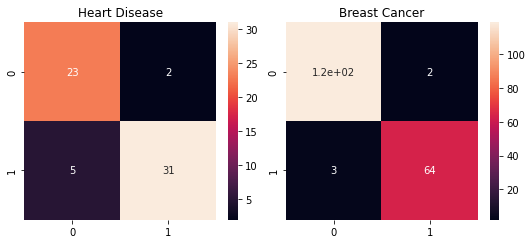

In [ ]:
# Heart Disease
#applying the trained model to x_test data
predictions1 = model1.predict(x1_test)

#generating cm (x,y)
cm1 = metrics.confusion_matrix(y1_test,predictions1)
cm1 = pd.DataFrame(cm1)

#constructing the heat map
# subplot(rows,cols,location)
plt.subplot(121)
plt.title('Heart Disease')
h1 = sns.heatmap(cm1, annot=True)

#####################################################
# Breast Cancer
predictions2 = model2.predict(x2_test)

cm2 = metrics.confusion_matrix(y2_test,predictions2)
cm2 = pd.DataFrame(cm2)

plt.subplot(122)
plt.title('Breast Cancer')
h2 = sns.heatmap(cm2, annot=True)

plt.tight_layout()
plt.show()



In [ ]:
print(cm1[0][0],cm1[1][0],cm1[0][1],cm1[1][1]);
print(cm2[0][0],cm2[1][0],cm2[0][1],cm2[1][1]);

23 2 5 31
119 2 3 64


In [ ]:
TN1 = cm1[0][0]
FN1 = cm1[0][1]
FP1 = cm1[1][0]
TP1 = cm1[1][1]

TN2 = cm2[0][0]
FN2 = cm2[0][1]
FP2 = cm2[1][0]
TP2 = cm2[1][1]

#all true values by total values
accu1 = (TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)*100
accu2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)*100
#actual positives that got predicted as positive
sensitivity1 = TP1 / (TP1+FN1 )* 100
sensitivity2 = TP2 / (TP2+FN2 )* 100
#actual negatives that got predicted as negative
specificity1 = TN1/(TN1 + FP1)*100
specificity2 = TN2/(TN2 + FP2)*100
#positive predictive value - proportion of all positively classifed cases that were truly positive
ppv1 = TP1 / (TP1+FP1) *100
ppv2 = TP2 / (TP2+FP2) *100
#positive predictive value - proportion of all negatively classifed cases that were truly negative
npv1 = TN1 / (TN1+FN1) *100
npv2 = TN2 / (TN2+FN2) *100

from tabulate import tabulate
info = {'Dataset': ['Heart', 'Breast'],'Accuracy %':[accu1,accu2],'Sensitivity %': [sensitivity1,sensitivity2],'Specificity %': [specificity1,specificity2],'positive predictive value in %':[ppv1,ppv2],'negative predictive value in %':[npv1,npv2]}
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))


╒═══════════╤══════════════╤═════════════════╤═════════════════╤══════════════════════════════════╤══════════════════════════════════╕
│ Dataset   │   Accuracy % │   Sensitivity % │   Specificity % │   positive predictive value in % │   negative predictive value in % │
╞═══════════╪══════════════╪═════════════════╪═════════════════╪══════════════════════════════════╪══════════════════════════════════╡
│ Heart     │      88.5246 │         86.1111 │         92      │                          93.9394 │                          82.1429 │
├───────────┼──────────────┼─────────────────┼─────────────────┼──────────────────────────────────┼──────────────────────────────────┤
│ Breast    │      97.3404 │         95.5224 │         98.3471 │                          96.9697 │                          97.541  │
╘═══════════╧══════════════╧═════════════════╧═════════════════╧══════════════════════════════════╧══════════════════════════════════╛


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#show the accuracy with different knn values
print('\n\nHeart Disease Dataset')
val = [3,5,7,9,11]
for i in val:
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x1_train,y1_train)
    Y_pred_knn1=knn1.predict(x1_test)

    from sklearn.metrics import accuracy_score

    score_knn1 = round(accuracy_score(Y_pred_knn1,y1_test)*100,2)

    print("The accuracy score achieved using KNN is at n=",i," is: "+str(score_knn1)+" %")

# ----------------------------------------------------------------------
print('\n\nBreast Cancer Dataset')
for i in val:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x2_train,y2_train)
    Y_pred_knn2=knn2.predict(x2_test)

    from sklearn.metrics import accuracy_score

    score_knn2 = round(accuracy_score(Y_pred_knn2,y2_test)*100,2)

    print("The accuracy score achieved using KNN is at n=",i," is: "+str(score_knn2)+" %")

print('\n\n')



Heart Disease Dataset
The accuracy score achieved using KNN is at n= 3  is: 81.97 %
The accuracy score achieved using KNN is at n= 5  is: 83.61 %
The accuracy score achieved using KNN is at n= 7  is: 85.25 %
The accuracy score achieved using KNN is at n= 9  is: 85.25 %
The accuracy score achieved using KNN is at n= 11  is: 83.61 %


Breast Cancer Dataset
The accuracy score achieved using KNN is at n= 3  is: 96.81 %
The accuracy score achieved using KNN is at n= 5  is: 97.34 %
The accuracy score achieved using KNN is at n= 7  is: 97.34 %
The accuracy score achieved using KNN is at n= 9  is: 95.74 %
The accuracy score achieved using KNN is at n= 11  is: 96.28 %



